In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Prediction: To predict whether a student got placed or not using classification models.
We have Gender and Educational qualification data.
We have all the educational performance(marks) data.
We have the status of placement and status is our target variable



In [ ]:
df=pd.read_csv('Placement_Data_Full_Class.csv')

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [ ]:
#Check for missing values
df.shape

(215, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [ ]:
print('Data columns with null values:',df.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


so there is no null values present in the data

In [ ]:
df.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


I dropped serial number as we have index as default and I  dropped the boards of school education as I believe it doesn't matter for Placement

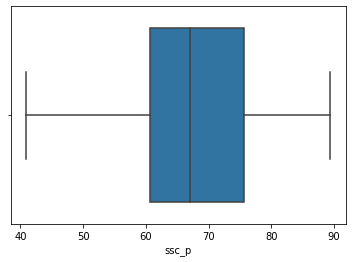

In [ ]:
# Removing outliers
# detecting outliers - target value
# boxplot
sns.boxplot(data=df, x="ssc_p")
plt.show()

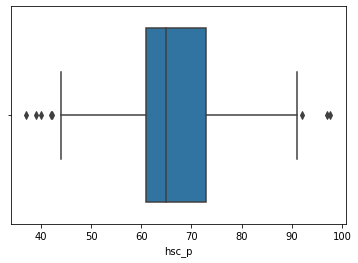

In [ ]:
sns.boxplot(data=df, x="hsc_p")
plt.show()

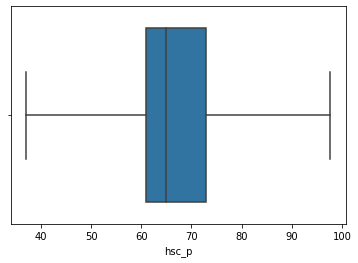

In [ ]:
sns.boxplot(data=df, x="hsc_p",whis=2.1)
plt.show()

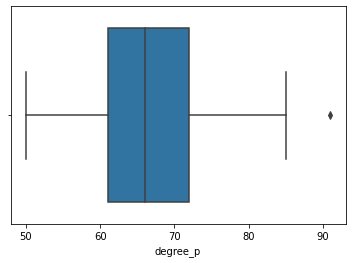

In [ ]:
sns.boxplot(data=df, x="degree_p")
plt.show()

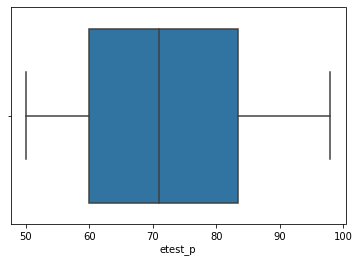

In [ ]:
sns.boxplot(data=df, x="etest_p")
plt.show()

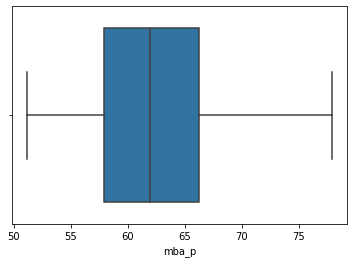

In [ ]:
sns.boxplot(data=df, x="mba_p")
plt.show()

In [ ]:
# Handling categorical data
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [ ]:
# Seperate categorical and numerical columns
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["float64", 'int64'])

In [ ]:
df_cat.head()

,gender,hsc_s,degree_t,workex,specialisation,status
0,M,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed


In [ ]:
df_num.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,67.00,91.00,58.00,55.0,58.80
1,79.33,78.33,77.48,86.5,66.28
2,65.00,68.00,64.00,75.0,57.80
3,56.00,52.00,52.00,66.0,59.43
4,85.80,73.60,73.30,96.8,55.50


In [ ]:
# fetch all the column_name
for col in df_cat:
  print(col)

gender
hsc_s
degree_t
workex
specialisation
status


In [ ]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [ ]:
df['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [ ]:
df['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [ ]:
df['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [ ]:
#use one hot encoding
for col in df_cat:
  df_cat[col] = pd.get_dummies(df[col])
print(df_cat.head())

   gender  hsc_s  degree_t  workex  specialisation  status
0       0      0         0       1               0       0
1       0      0         0       0               1       0
2       0      1         1       1               1       0
3       0      0         0       1               0       1
4       0      0         1       1               1       0


In [ ]:
#reducing skewness
df_num.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,67.00,91.00,58.00,55.0,58.80
1,79.33,78.33,77.48,86.5,66.28
2,65.00,68.00,64.00,75.0,57.80
3,56.00,52.00,52.00,66.0,59.43
4,85.80,73.60,73.30,96.8,55.50


In [ ]:
from scipy.stats import skew

ssc_p = -0.13172222936276662


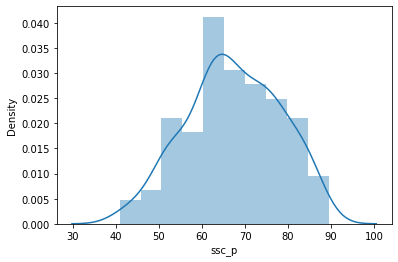

************************************************
hsc_p = 0.16249524333889379


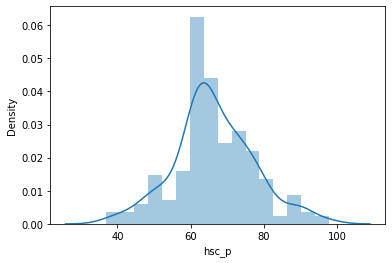

************************************************
degree_p = 0.2432051150913615


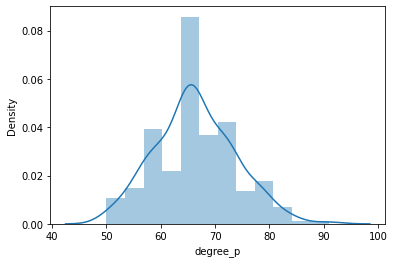

************************************************
etest_p = 0.2803347371539651


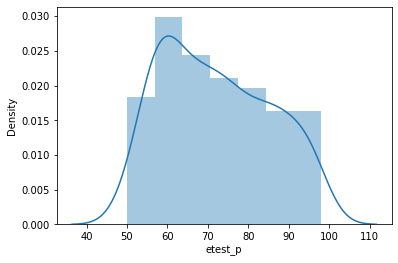

************************************************
mba_p = 0.3113836624067974


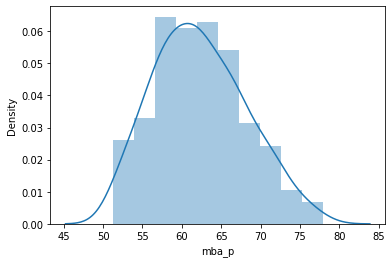

************************************************


In [ ]:
for col in df_num:
  try:
    print(col, "=", skew(df_num[col]))
    sns.distplot(df_num[col])
    plt.show()
  except:
    pass
  finally:
    print("************************************************")

All skewness value of numerical datafram is in between -0.5 and 0.5

In [ ]:
# Scaling of data
from sklearn.preprocessing import StandardScaler
for col in df_num:
  ss = StandardScaler()
  df_num[col] = ss.fit_transform(df_num[[col]])
df_num.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647
1,1.113369,1.103448,1.513267,1.087157,0.687620
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396
4,1.712332,0.668391,0.943909,1.864806,-1.164676


In [ ]:
# merge data frames to make it complete
new_df = pd.concat([df_num, df_cat], axis=1)

In [ ]:
new_df.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender,hsc_s,degree_t,workex,specialisation,status
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,0,0,0,1,0,0
1,1.113369,1.103448,1.513267,1.087157,0.687620,0,0,0,0,1,0
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474,0,1,1,1,1,0
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,0,0,0,1,0,1
4,1.712332,0.668391,0.943909,1.864806,-1.164676,0,0,1,1,1,0


In [ ]:
# spliting of data - train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
x = new_df.drop('status',axis=1)
y = new_df['status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logr = LogisticRegression()
logr.fit(x_train, y_train)
y_pred = logr.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logr.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_hat = dt.predict(x_test)
print("R2 = ", r2_score(y_test, y_hat))

R2 =  0.001182033096926438


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt1.fit(x_train,y_train)
y_pred = dt1.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7384615384615385


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()

In [ ]:
print(tp, fn)
print(fp, tn)

16 2
11 36


In [ ]:
from sklearn.metrics import (accuracy_score, recall_score, 
                             precision_score, f1_score)

In [ ]:
accuracy_score(y_test, y_hat)

0.8

In [ ]:
recall_score(y_test, y_hat)

0.8888888888888888

In [ ]:
precision_score(y_test, y_hat)

0.5925925925925926

In [ ]:
f1_score(y_test, y_hat)

0.711111111111111

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_hat))

0.8274231678486997


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_hat)

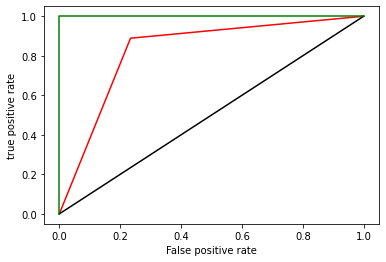

In [ ]:
plt.plot(fpr, tpr, 'r-')
plt.plot([0,1], [0,1], 'k-', label="50% correct")
plt.plot([0,0,1], [0,1,1], 'g-', label="excellent")
plt.xlabel('False positive rate')
plt.ylabel("true positive rate")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC

In [ ]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

0.8461538461538461